In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV

In [5]:
missing_values = ["n/a", "na", "--", "?"]
pima_df = pd.read_csv('pima.data',na_values = missing_values)

pima_df



6  148  72  35    0  33.6  0.627  50  positive
0     1   85  66  29    0  26.6  0.351  31  negative
1     8  183  64   0    0  23.3  0.672  32  positive
2     1   89  66  23   94  28.1  0.167  21  negative
3     0  137  40  35  168  43.1  2.288  33  positive
4     5  116  74   0    0  25.6  0.201  30  negative
..   ..  ...  ..  ..  ...   ...    ...  ..       ...
762  10  101  76  48  180  32.9  0.171  63  negative
763   2  122  70  27    0  36.8  0.340  27  negative
764   5  121  72  23  112  26.2  0.245  30  negative
765   1  126  60   0    0  30.1  0.349  47  positive
766   1   93  70  31    0  30.4  0.315  23  negative

[767 rows x 9 columns]

In [6]:
pima_df.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class']
pima_df
print(pima_df['Class'].value_counts())

negative    500
positive    267
Name: Class, dtype: int64


In [7]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Class                     767 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


Count of Non-diabetic records 500
Count of Diabetic records 267


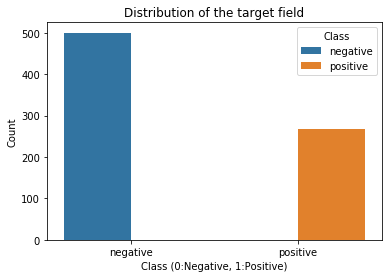

In [8]:
negative, positive = pima_df['Class'].value_counts()
print('Count of Non-diabetic records', negative)
print('Count of Diabetic records', positive)
sns.countplot(x="Class", hue="Class", data=pima_df)
plt.ylabel('Count')
plt.xlabel('Class (0:Negative, 1:Positive)')
plt.title('Distribution of the target field')
plt.show()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64


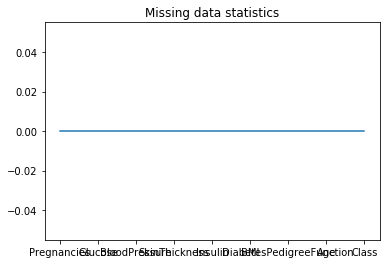

In [9]:
c = pima_df.isnull().sum()
plt.title("Missing data statistics")
c.plot(kind='line')
print(c)

Count of Negative patients 500
Count of Positive patients 267


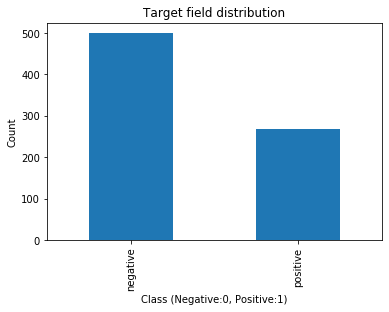

In [10]:
negative, positive = pima_df['Class'].value_counts()
print('Count of Negative patients', negative)
print('Count of Positive patients', positive)
pima_df['Class'].value_counts().plot(kind='bar', title='Target field distribution')
plt.ylabel('Count')
plt.xlabel('Class (Negative:0, Positive:1)')
plt.show()

In [11]:
#Rename categorical data in target
replace_class_1 = {"Class":     {"negative": 0, "positive": 1}}
pima_df = pima_df.replace(replace_class_1)
pima_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       85             66             29        0  26.6   
1            8      183             64              0        0  23.3   
2            1       89             66             23       94  28.1   
3            0      137             40             35      168  43.1   
4            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Class  
0                     0.351   31      0  
1                     0.672   32      1  
2                     0.167   21      0  
3                     2.288   33      1  
4                     0.201   30      0

Text(0, 0.5, 'Density')

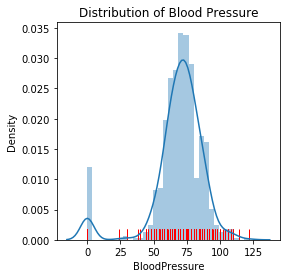

In [21]:
plt.figure(figsize=(4,4))
plt.title('Distribution of Blood Pressure')
sns.distplot(pima_df['BloodPressure'], rug= True, rug_kws={'color': 'red'}) 
#Hist = False or rug = True (give data points details)
plt.ylabel('Density')

Text(0, 0.5, 'Density')

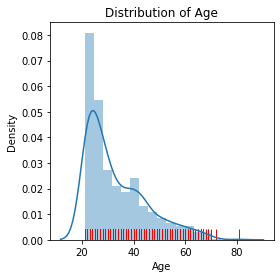

In [10]:
plt.figure(figsize=(4,4))
plt.title('Distribution of Age')
sns.distplot(pima_df['Age'], rug= True, rug_kws={'color': 'red'}) 
#Hist = False or rug = True (give data points details)
plt.ylabel('Density')

Text(0, 0.5, 'Density')

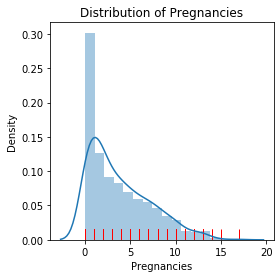

In [11]:
plt.figure(figsize=(4,4))
plt.title('Distribution of Pregnancies')
sns.distplot(pima_df['Pregnancies'], rug= True, rug_kws={'color': 'red'}) 
#Hist = False or rug = True (give data points details)
plt.ylabel('Density')

Text(0, 0.5, 'Density')

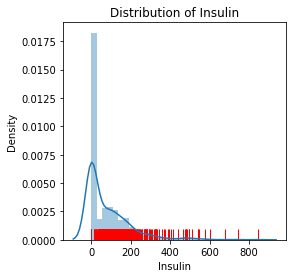

In [12]:
plt.figure(figsize=(4,4))
plt.title('Distribution of Insulin')
sns.distplot(pima_df['Insulin'], rug= True, rug_kws={'color': 'red'}) 
#Hist = False or rug = True (give data points details)
plt.ylabel('Density')

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Box-plot for Pima Diabetes')

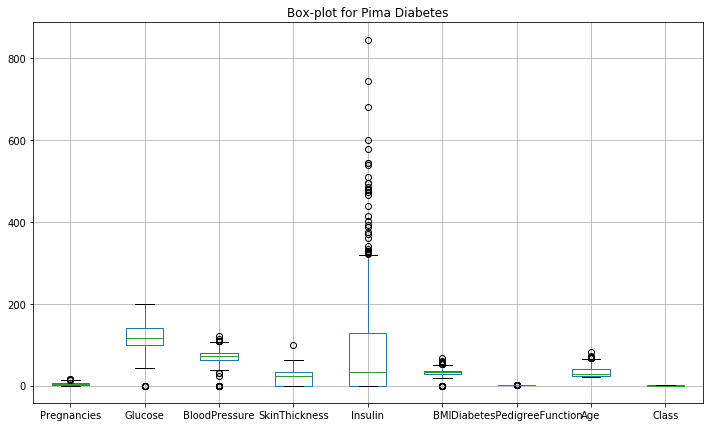

In [13]:
plt.figure(figsize=(12, 7))
print (pima_df.boxplot() )
plt.title('Box-plot for Pima Diabetes')

Text(0.5, 1.0, 'Box-plot for Insulin')

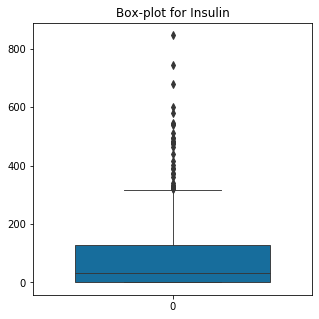

In [14]:
plt.figure(figsize=(5, 5))
bplot = sns.boxplot(data=pima_df['Insulin'],
                 width=0.7,
                 palette="colorblind",linewidth=0.9)
plt.title('Box-plot for Insulin')

Text(0.5, 1.0, 'Box-plot for Pregnancies')

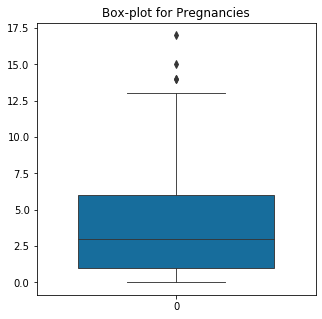

In [15]:
plt.figure(figsize=(5, 5))
bplot = sns.boxplot(data=pima_df['Pregnancies'],
                 width=0.7,
                 palette="colorblind",linewidth=0.9)
plt.title('Box-plot for Pregnancies')

Text(0.5, 1.0, 'Box-plot for SkinThickness')

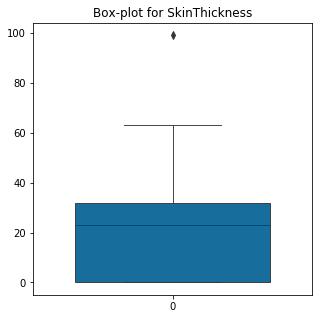

In [16]:
plt.figure(figsize=(5, 5))
bplot = sns.boxplot(data=pima_df['SkinThickness'],
                 width=0.7,
                 palette="colorblind",linewidth=0.9)
plt.title('Box-plot for SkinThickness')

Text(0.5, 1.0, 'Box-plot for Blood Pressure')

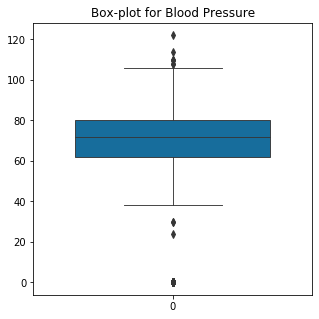

In [17]:
plt.figure(figsize=(5, 5))
bplot = sns.boxplot(data=pima_df['BloodPressure'],
                 width=0.7,
                 palette="colorblind",linewidth=0.9)
plt.title('Box-plot for Blood Pressure')

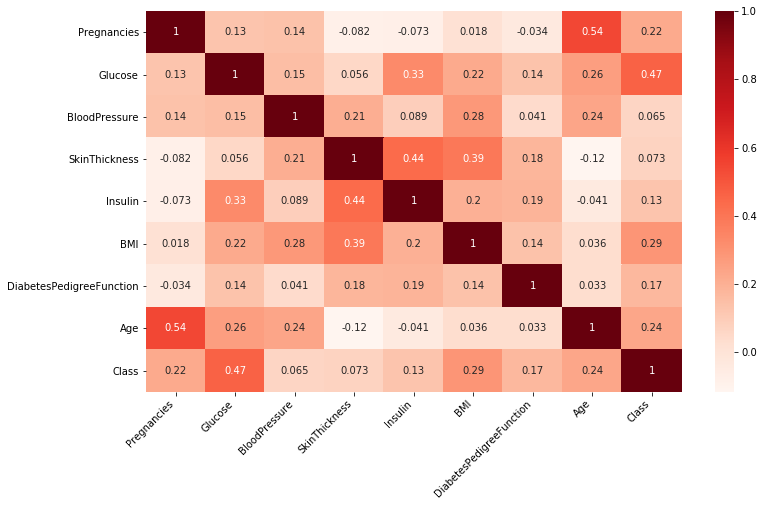

In [18]:
plt.figure(figsize=(12,7))
cor = pima_df.corr(method='pearson')
ax = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

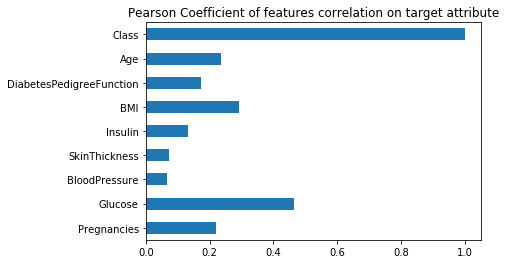

In [19]:
cor_target = cor["Class"]
plt.title("Pearson Coefficient of features correlation on target attribute")
cor_target.plot(kind='barh')

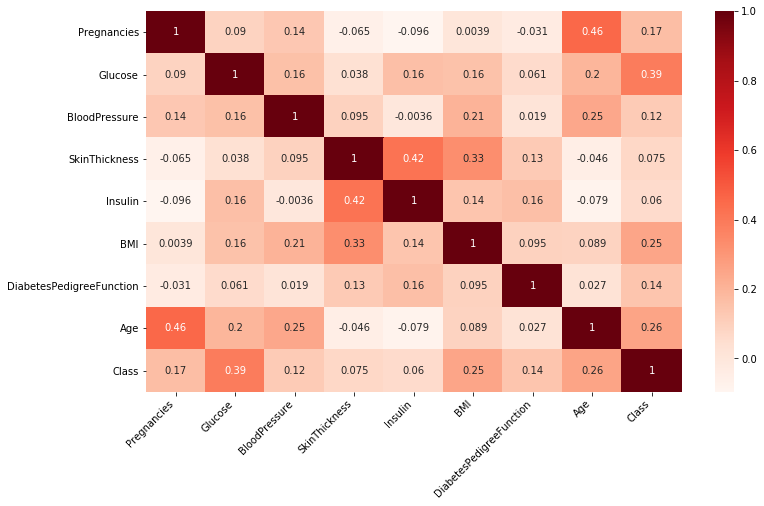

In [20]:
plt.figure(figsize=(12,7))
kendall_corr = pima_df.corr(method='kendall')
ax = sns.heatmap(kendall_corr, annot=True, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

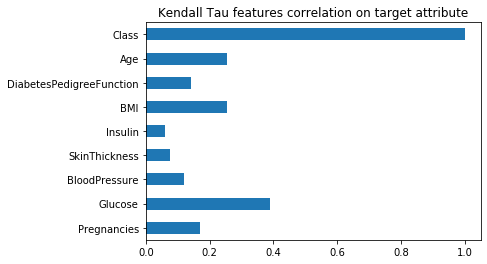

In [21]:
kendall_corr_target = kendall_corr["Class"]
plt.title("Kendall Tau features correlation on target attribute")
kendall_corr_target.plot(kind='barh')

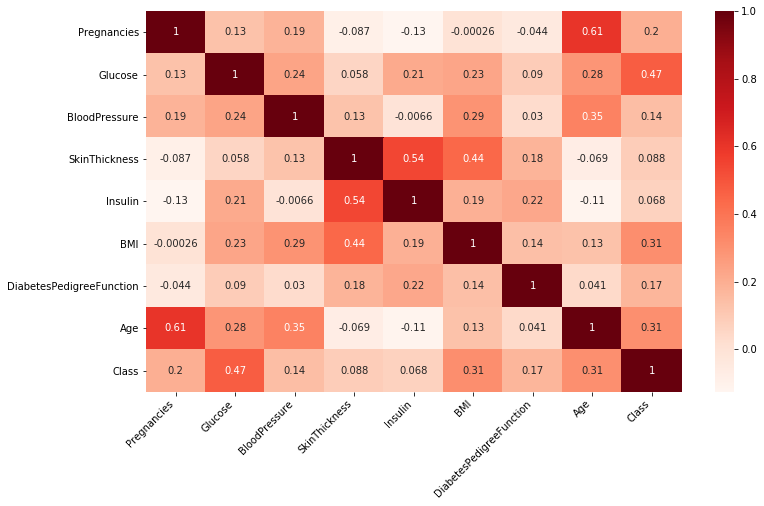

In [22]:
plt.figure(figsize=(12,7))
spearman_corr = pima_df.corr(method='spearman')
ax = sns.heatmap(spearman_corr, annot=True, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

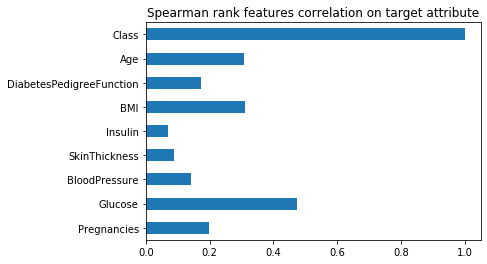

In [23]:
spearman_corr_target = abs(spearman_corr["Class"])
plt.title("Spearman rank features correlation on target attribute")
spearman_corr_target.plot(kind='barh')

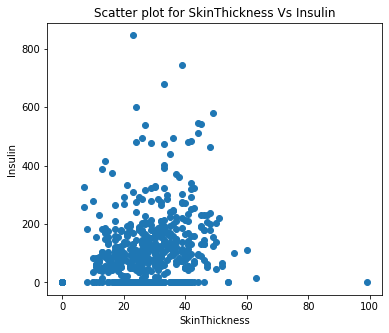

In [24]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(pima_df['SkinThickness'], pima_df['Insulin'])
ax.set_xlabel('SkinThickness')
ax.set_ylabel('Insulin')
plt.title('Scatter plot for SkinThickness Vs Insulin')

plt.show()

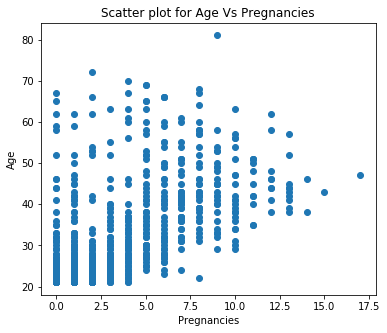

In [25]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(pima_df['Pregnancies'], pima_df['Age'])
ax.set_xlabel('Pregnancies')
ax.set_ylabel('Age')
plt.title('Scatter plot for Age Vs Pregnancies')

plt.show()

In [12]:
x= pima_df.drop(['Class'], axis=1)
x
y = pima_df['Class']
print(x)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1       85             66             29        0  26.6   
1              8      183             64              0        0  23.3   
2              1       89             66             23       94  28.1   
3              0      137             40             35      168  43.1   
4              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
762           10      101             76             48      180  32.9   
763            2      122             70             27        0  36.8   
764            5      121             72             23      112  26.2   
765            1      126             60              0        0  30.1   
766            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.351   31  
1                       0.672   32  


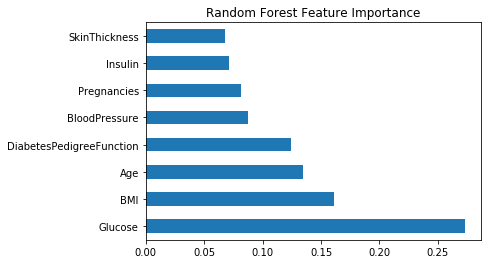

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x,y)
#print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=(pima_df.drop('Class', axis=1)).columns)
feat_importances.nlargest(10).plot(kind='barh')
#plt.xlim([0,0.01])
plt.title('Random Forest Feature Importance')
plt.show()

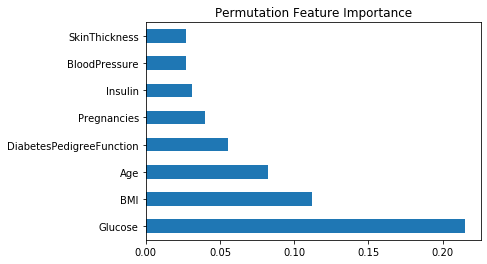

In [28]:
from sklearn.inspection import permutation_importance


# perform permutation importance
results = permutation_importance(model, x, y, scoring='accuracy')
# get importance
importance = results.importances_mean

Permutation_feat_importances = pd.Series(importance, index=(pima_df.drop('Class', axis=1)).columns)
Permutation_feat_importances.nlargest(25).plot(kind='barh')
plt.title('Permutation Feature Importance')
plt.show()

# Sampling Techniques with GridSearchCV

In [13]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import  geometric_mean_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, precision_score 
from sklearn.metrics import recall_score, average_precision_score, auc

# Sampling with K-cross validation

In [14]:
def sampling_modeling(sampler, model, x, y, k):
    kf = KFold(n_splits=k, shuffle = True, random_state=1)
    acc_score = []
    recal_score = []
    pres_score = []
    _fscore = []
    aucroc_score = []
    gmean_score = []
    for train_index , test_index in kf.split(x):
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    
        #sampler_nearmiss = NearMiss()
        sampled_x, sampled_y = sampler.fit_resample(X_train, y_train)
    #construct_pipeline = make_pipeline(sampler, model)
        model.fit(sampled_x,sampled_y)
        pred_values = model.predict(X_test)
        acc, recal, precis, aucroc, gmean, _val = evaluation(pred_values, y_test)
        #print(acc)
        #print(precis)
        acc_score.append(acc)
        recal_score.append(recal)
        pres_score.append(precis)
        _fscore.append(_val)
        aucroc_score.append(aucroc)
        gmean_score.append(gmean)
        #print(f_val)
    
    avg_acc_score = sum(acc_score)/k
    avg_recal_score = sum(recal_score)/k
    avg_precis_score = sum(pres_score)/k
    avg_f_score = sum(_fscore)/k
    avg_auc_score = sum(aucroc_score)/k
    avg_gmean_score = sum(gmean_score)/k
    print('Metrics for each fold of {0}, {1}'.format(sampler, model))
    print('Accuracy : {0}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('Recall : {0}'.format(recal_score))
    print('Avg recall : {}'.format(avg_recal_score))
    print('Precision : {0}'.format(pres_score))
    print('Avg precision : {}'.format(avg_precis_score))
    print('F1_score : {0}'.format(_fscore))
    print('Avg f-score : {}'.format(avg_f_score))
    print('AUC_ROC : {0}'.format(aucroc_score))
    print('Avg AUC_ROC : {}'.format(avg_auc_score))
    print('Geometric mean : {0}'.format(gmean_score))
    print('Avg gmean : {}'.format(avg_gmean_score))
    
        
      
    

In [15]:
def modelling_without_sampling(model, x, y, k):
    kf = KFold(n_splits=k, shuffle = True, random_state=1)
    acc_score = []
    recal_score = []
    pres_score = []
    _fscore = []
    aucroc_score = []
    gmean_score = []
    for train_index , test_index in kf.split(x):
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        model.fit(X_train, y_train)
        pred_values = model.predict(X_test)
        acc, recal, precis, aucroc, gmean, _val = evaluation(pred_values, y_test)
        #print(acc)
        #print(precis)
        acc_score.append(acc)
        recal_score.append(recal)
        pres_score.append(precis)
        _fscore.append(_val)
        aucroc_score.append(aucroc)
        gmean_score.append(gmean)
        #print(f_val)
    
    avg_acc_score = sum(acc_score)/k
    avg_recal_score = sum(recal_score)/k
    avg_precis_score = sum(pres_score)/k
    avg_f_score = sum(_fscore)/k
    avg_auc_score = sum(aucroc_score)/k
    avg_gmean_score = sum(gmean_score)/k
    print('Metrics for each fold of {0}'.format(model))
    print('Accuracy : {0}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('Recall : {0}'.format(recal_score))
    print('Avg recall : {}'.format(avg_recal_score))
    print('Precision : {0}'.format(pres_score))
    print('Avg precision : {}'.format(avg_precis_score))
    print('F1_score : {0}'.format(_fscore))
    print('Avg f-score : {}'.format(avg_f_score))
    print('AUC_ROC : {0}'.format(aucroc_score))
    print('Avg AUC_ROC : {}'.format(avg_auc_score))
    print('Geometric mean : {0}'.format(gmean_score))
    print('Avg gmean : {}'.format(avg_gmean_score))
    
        
      
    

In [16]:
def evaluation(pred_values, y_test):
    
    acc = accuracy_score(y_test, pred_values)
    recal = recall_score(y_test, pred_values)
    precis = precision_score(y_test, pred_values)
    #val = f1_score(y_test, pred_values)
    aucroc = roc_auc_score(y_test, pred_values)
    _val = f1_score(y_test, pred_values)
    gmean = geometric_mean_score(y_test, pred_values)
    return acc, recal, precis, aucroc, gmean, _val
    
    
   


# Resampling and Modelling with balanced data

In [17]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_nearmiss = NearMiss()
sampling_modeling(sampler_nearmiss, model, x, y, k = 5)

Metrics for each fold of NearMiss(), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.6883116883116883, 0.7272727272727273, 0.7189542483660131, 0.7777777777777778, 0.6666666666666666]
Avg accuracy : 0.7157966216789746
Recall : [0.6739130434782609, 0.6590909090909091, 0.7857142857142857, 0.7894736842105263, 0.640625]
Avg recall : 0.7097633844987964
Precision : [0.484375, 0.5178571428571429, 0.5866666666666667, 0.6716417910447762, 0.5942028985507246]
Avg precision : 0.5709486998238621
F1_score : [0.5636363636363637, 0.5800000000000001, 0.6717557251908396, 0.7258064516129032, 0.6165413533834587]
Avg f-score : 0.631547978764713
AUC_ROC : [0.6841787439613527, 0.7068181818181818, 0.7330633284241531, 0.7801535087719299, 0.6630091292134832]
Avg AUC_ROC : 0.71344457843782
Geometric mean : [0.6841017242209857, 0.7052049699107181, 0.7311701034483907, 0.7800978346200862, 0.6626311614916516]
Avg gmean : 0.7126411587383664


In [18]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_random = RandomUnderSampler(random_state=0)
sampling_modeling(sampler_random, model, x, y, k = 5)

Metrics for each fold of RandomUnderSampler(random_state=0), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.7207792207792207, 0.7207792207792207, 0.7450980392156863, 0.7712418300653595, 0.7516339869281046]
Avg accuracy : 0.7419064595535183
Recall : [0.6956521739130435, 0.6590909090909091, 0.8214285714285714, 0.7894736842105263, 0.734375]
Avg recall : 0.7400040677286102
Precision : [0.5245901639344263, 0.5087719298245614, 0.6133333333333333, 0.6617647058823529, 0.6911764705882353]
Avg precision : 0.5999273207125817
F1_score : [0.5981308411214953, 0.5742574257425743, 0.7022900763358778, 0.72, 0.7121212121212122]
Avg f-score : 0.6613599110642319
AUC_ROC : [0.7135668276972624, 0.7022727272727274, 0.7612297496318114, 0.7749451754385965, 0.7492099719101123]
Avg AUC_ROC : 0.740244890390102
Geometric mean : [0.713341911547139, 0.700943873680045, 0.7588457244913437, 0.7748089747598572, 0.7490630852057639]
Avg gmean : 0.7394007139368297


In [19]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_smt = SMOTE(random_state=0)
sampling_modeling(sampler_smt, model, x, y, k = 5)

Metrics for each fold of SMOTE(random_state=0), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.7207792207792207, 0.7662337662337663, 0.7712418300653595, 0.7647058823529411, 0.7058823529411765]
Avg accuracy : 0.7457686104744928
Recall : [0.6521739130434783, 0.6136363636363636, 0.75, 0.7192982456140351, 0.65625]
Avg recall : 0.6782717044587754
Precision : [0.5263157894736842, 0.5869565217391305, 0.6666666666666666, 0.6721311475409836, 0.6461538461538462]
Avg precision : 0.6196447943148622
F1_score : [0.5825242718446602, 0.6, 0.7058823529411765, 0.6949152542372881, 0.6511627906976746]
Avg f-score : 0.6468969339441599
AUC_ROC : [0.7010869565217391, 0.7204545454545455, 0.7667525773195877, 0.7554824561403509, 0.6989115168539326]
Avg AUC_ROC : 0.7285376104580312
Geometric mean : [0.6993786061802353, 0.7124918442334436, 0.7665695441245898, 0.754615428178118, 0.6976082735825218]
Avg gmean : 0.7261327392597817


In [20]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_ada = ADASYN(random_state=0)
sampling_modeling(sampler_ada, model, x, y, k = 5)

Metrics for each fold of ADASYN(random_state=0), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.7402597402597403, 0.7532467532467533, 0.7647058823529411, 0.8169934640522876, 0.7058823529411765]
Avg accuracy : 0.7562176385705797
Recall : [0.7608695652173914, 0.6136363636363636, 0.7321428571428571, 0.7894736842105263, 0.640625]
Avg recall : 0.7073494940414277
Precision : [0.546875, 0.5625, 0.6612903225806451, 0.7377049180327869, 0.6507936507936508]
Avg precision : 0.6318327782814166
F1_score : [0.6363636363636365, 0.5869565217391304, 0.6949152542372881, 0.7627118644067797, 0.6456692913385828]
Avg f-score : 0.6653233136170835
AUC_ROC : [0.7461755233494364, 0.7113636363636364, 0.7578240058910162, 0.8114035087719298, 0.6967169943820226]
Avg AUC_ROC : 0.7446967337516082
Geometric mean : [0.7460308283036219, 0.7046187645143898, 0.7573887393562713, 0.8111071056538127, 0.6944553682037214]
Avg gmean : 0.7427201612063634


In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
sampler_smote = SMOTE(random_state=0)
sampling_modeling(sampler_smote, model, x, y, k = 5)

Metrics for each fold of SMOTE(random_state=0), RandomForestClassifier(random_state=0)
Accuracy : [0.7857142857142857, 0.7792207792207793, 0.7777777777777778, 0.7777777777777778, 0.7189542483660131]
Avg accuracy : 0.7678889737713267
Recall : [0.6956521739130435, 0.6136363636363636, 0.7857142857142857, 0.7017543859649122, 0.671875]
Avg recall : 0.693726441845721
Precision : [0.6274509803921569, 0.6136363636363636, 0.6666666666666666, 0.7017543859649122, 0.6615384615384615]
Avg precision : 0.6542093716397122
F1_score : [0.6597938144329897, 0.6136363636363636, 0.721311475409836, 0.7017543859649122, 0.6666666666666667]
Avg f-score : 0.6726325412221537
AUC_ROC : [0.7598631239935588, 0.7295454545454546, 0.7794550810014728, 0.7623355263157894, 0.7123419943820226]
Avg AUC_ROC : 0.7487082360476597
Geometric mean : [0.7571452443851232, 0.720278871613323, 0.7794299491650135, 0.7599245884408261, 0.7111916333350967]
Avg gmean : 0.7455940573878765


In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
sampler_ADASYN = ADASYN(random_state=0)
sampling_modeling(sampler_ADASYN, model, x, y, k = 5)

Metrics for each fold of ADASYN(random_state=0), RandomForestClassifier(random_state=0)
Accuracy : [0.7467532467532467, 0.7727272727272727, 0.7647058823529411, 0.803921568627451, 0.6862745098039216]
Avg accuracy : 0.7548764960529667
Recall : [0.717391304347826, 0.6363636363636364, 0.7678571428571429, 0.7894736842105263, 0.640625]
Avg recall : 0.7103421535558263
Precision : [0.559322033898305, 0.5957446808510638, 0.6515151515151515, 0.7142857142857143, 0.6212121212121212]
Avg precision : 0.6284159403524712
F1_score : [0.6285714285714286, 0.6153846153846154, 0.7049180327868853, 0.7500000000000001, 0.6307692307692307]
Avg f-score : 0.665928661502432
AUC_ROC : [0.7383252818035428, 0.7318181818181818, 0.7653718703976435, 0.8009868421052632, 0.6798630617977528]
Avg AUC_ROC : 0.7432730475844769
Geometric mean : [0.7380284481902878, 0.7255661796085423, 0.7653678353685823, 0.8009040943964844, 0.678729811709616]
Avg gmean : 0.7417192738547026


In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
sampler_nearmiss = NearMiss()
sampling_modeling(sampler_nearmiss, model, x, y, k = 5)

Metrics for each fold of NearMiss(), RandomForestClassifier(random_state=0)
Accuracy : [0.7012987012987013, 0.7337662337662337, 0.7581699346405228, 0.803921568627451, 0.7189542483660131]
Avg accuracy : 0.7432221373397845
Recall : [0.6521739130434783, 0.6590909090909091, 0.7857142857142857, 0.8245614035087719, 0.71875]
Avg recall : 0.7280581022714889
Precision : [0.5, 0.5272727272727272, 0.6376811594202898, 0.7014925373134329, 0.647887323943662]
Avg precision : 0.6028667495900224
F1_score : [0.5660377358490566, 0.5858585858585857, 0.7039999999999998, 0.7580645161290324, 0.6814814814814815]
Avg f-score : 0.6590884638636313
AUC_ROC : [0.6871980676328502, 0.7113636363636364, 0.7639911634756995, 0.8081140350877192, 0.7189255617977528]
Avg AUC_ROC : 0.7379184928715317
Geometric mean : [0.6863049560899463, 0.7094404732773335, 0.7636822662790859, 0.8079466429027214, 0.7189255403616355]
Avg gmean : 0.7372599757821445


In [24]:
from imblearn.under_sampling import RandomUnderSampler
model = RandomForestClassifier(random_state=0)
sampler_random_under = RandomUnderSampler(random_state=0)
sampling_modeling(sampler_random_under, model, x, y, k = 5)

Metrics for each fold of RandomUnderSampler(random_state=0), RandomForestClassifier(random_state=0)
Accuracy : [0.7402597402597403, 0.7337662337662337, 0.7516339869281046, 0.7647058823529411, 0.7516339869281046]
Avg accuracy : 0.7483999660470249
Recall : [0.6956521739130435, 0.6590909090909091, 0.8392857142857143, 0.8070175438596491, 0.75]
Avg recall : 0.7502092682298632
Precision : [0.5517241379310345, 0.5272727272727272, 0.618421052631579, 0.647887323943662, 0.6857142857142857]
Avg precision : 0.6062039054986578
F1_score : [0.6153846153846154, 0.5858585858585857, 0.7121212121212123, 0.7187500000000001, 0.7164179104477612]
Avg f-score : 0.6697064647624349
AUC_ROC : [0.7274557165861514, 0.7113636363636364, 0.770158321060383, 0.7733004385964911, 0.7514044943820226]
Avg AUC_ROC : 0.7467365213977368
Geometric mean : [0.726760176583246, 0.7094404732773335, 0.7670497004786706, 0.7725650297199576, 0.751403181769304]
Avg gmean : 0.7454437123657024


In [25]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=0)
sampler_random_under = RandomUnderSampler(random_state=0)
sampling_modeling(sampler_random_under, model, x, y, k = 5)

Metrics for each fold of RandomUnderSampler(random_state=0), AdaBoostClassifier(random_state=0)
Accuracy : [0.7142857142857143, 0.7857142857142857, 0.7058823529411765, 0.7124183006535948, 0.7320261437908496]
Avg accuracy : 0.7300653594771243
Recall : [0.6956521739130435, 0.7272727272727273, 0.7321428571428571, 0.6491228070175439, 0.71875]
Avg recall : 0.7045881130692344
Precision : [0.5161290322580645, 0.6037735849056604, 0.5774647887323944, 0.6065573770491803, 0.6666666666666666]
Avg precision : 0.5941182899223932
F1_score : [0.5925925925925926, 0.6597938144329897, 0.6456692913385826, 0.6271186440677966, 0.6917293233082707]
Avg f-score : 0.6433807331480464
AUC_ROC : [0.7089371980676328, 0.7681818181818182, 0.7114322533136966, 0.6995614035087719, 0.7301615168539327]
Avg AUC_ROC : 0.7236548379851705
Geometric mean : [0.7088127107615932, 0.7670917494446904, 0.7111307347766902, 0.6977407149243606, 0.7300723374964484]
Avg gmean : 0.7229696494807565


In [26]:
model = AdaBoostClassifier(random_state=0)
sampler_nearmiss = NearMiss()
sampling_modeling(sampler_nearmiss, model, x, y, k = 5)

Metrics for each fold of NearMiss(), AdaBoostClassifier(random_state=0)
Accuracy : [0.6818181818181818, 0.7662337662337663, 0.7124183006535948, 0.7189542483660131, 0.6666666666666666]
Avg accuracy : 0.7092182327476445
Recall : [0.5869565217391305, 0.6590909090909091, 0.7321428571428571, 0.7192982456140351, 0.671875]
Avg recall : 0.6738727067173864
Precision : [0.47368421052631576, 0.58, 0.5857142857142857, 0.6029411764705882, 0.589041095890411]
Avg precision : 0.5662761537203201
F1_score : [0.5242718446601942, 0.6170212765957446, 0.6507936507936508, 0.6559999999999999, 0.6277372262773723]
Avg f-score : 0.6151647996653924
AUC_ROC : [0.6545893719806763, 0.7340909090909091, 0.7165868924889542, 0.7190241228070176, 0.6673981741573034]
Avg AUC_ROC : 0.6983378941049722
Geometric mean : [0.6510860492118233, 0.7302495893938711, 0.7164180249342298, 0.7190240705533353, 0.6673831589865572]
Avg gmean : 0.6968321786159634


In [27]:
model = AdaBoostClassifier(random_state=0)
sampler_smt1 = SMOTE(random_state=0)
sampling_modeling(sampler_smt1, model, x, y, k = 5)

Metrics for each fold of SMOTE(random_state=0), AdaBoostClassifier(random_state=0)
Accuracy : [0.7337662337662337, 0.7857142857142857, 0.6993464052287581, 0.7581699346405228, 0.6993464052287581]
Avg accuracy : 0.7352686529157116
Recall : [0.717391304347826, 0.7045454545454546, 0.7142857142857143, 0.7543859649122807, 0.71875]
Avg recall : 0.7218716876182552
Precision : [0.5409836065573771, 0.6078431372549019, 0.5714285714285714, 0.6515151515151515, 0.6216216216216216]
Avg precision : 0.5986784176755247
F1_score : [0.6168224299065421, 0.6526315789473683, 0.634920634920635, 0.6991869918699187, 0.6666666666666667]
Avg f-score : 0.6540456604622262
AUC_ROC : [0.7290660225442833, 0.7613636363636362, 0.7025036818851252, 0.7574013157894737, 0.7020716292134832]
Avg AUC_ROC : 0.7304812571592004
Geometric mean : [0.7289725414469155, 0.7592405949313666, 0.7024048738261066, 0.7573953134385725, 0.7018734960763101]
Avg gmean : 0.7299773639438543


In [28]:
model = AdaBoostClassifier(random_state=0)
sampler_ada = ADASYN(random_state=0)
sampling_modeling(sampler_ada, model, x, y, k = 5)

Metrics for each fold of ADASYN(random_state=0), AdaBoostClassifier(random_state=0)
Accuracy : [0.7207792207792207, 0.7922077922077922, 0.6862745098039216, 0.7843137254901961, 0.7320261437908496]
Avg accuracy : 0.7431202784143961
Recall : [0.7608695652173914, 0.75, 0.6607142857142857, 0.8771929824561403, 0.71875]
Avg recall : 0.7535053666775635
Precision : [0.5223880597014925, 0.6111111111111112, 0.5606060606060606, 0.6578947368421053, 0.6666666666666666]
Avg precision : 0.6037333269854872
F1_score : [0.6194690265486725, 0.6734693877551021, 0.6065573770491803, 0.7518796992481203, 0.6917293233082707]
Avg f-score : 0.6686209627818692
AUC_ROC : [0.7322866344605476, 0.7795454545454545, 0.6808726067746685, 0.8031798245614037, 0.7301615168539327]
Avg AUC_ROC : 0.7452092074392015
Geometric mean : [0.731728591131237, 0.7789853540460063, 0.6805741317065754, 0.7997623916144943, 0.7300723374964484]
Avg gmean : 0.7442245611989522


# Modelling with Imbalanced data

In [29]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
modelling_without_sampling(model, x, y, k = 5)

Metrics for each fold of LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.7272727272727273, 0.7597402597402597, 0.7843137254901961, 0.7908496732026143, 0.7581699346405228]
Avg accuracy : 0.764069264069264
Recall : [0.4782608695652174, 0.5681818181818182, 0.7142857142857143, 0.6666666666666666, 0.625]
Avg recall : 0.6104790137398833
Precision : [0.55, 0.5813953488372093, 0.7017543859649122, 0.7450980392156863, 0.7547169811320755]
Avg precision : 0.6665929510299767
F1_score : [0.5116279069767442, 0.5747126436781609, 0.7079646017699114, 0.7037037037037038, 0.6837606837606838]
Avg f-score : 0.6363539079778407
AUC_ROC : [0.6557971014492753, 0.7022727272727274, 0.7695139911634757, 0.7656249999999999, 0.7394662921348314]
Avg AUC_ROC : 0.7265350224040619
Geometric mean : [0.6313087395543334, 0.6893523130955955, 0.7675295564533363, 0.759202798262025, 0.7305531227559974]
Avg gmean : 0.7155893060242575


In [30]:
model = AdaBoostClassifier(random_state=0)
modelling_without_sampling(model, x, y, k = 5)

Metrics for each fold of AdaBoostClassifier(random_state=0)
Accuracy : [0.7467532467532467, 0.7922077922077922, 0.738562091503268, 0.7450980392156863, 0.7058823529411765]
Avg accuracy : 0.745700704524234
Recall : [0.6304347826086957, 0.5454545454545454, 0.5714285714285714, 0.543859649122807, 0.5]
Avg recall : 0.5582355097229239
Precision : [0.5686274509803921, 0.6666666666666666, 0.6666666666666666, 0.7045454545454546, 0.7111111111111111]
Avg precision : 0.6635234699940582
F1_score : [0.5979381443298969, 0.6, 0.6153846153846153, 0.613861386138614, 0.5871559633027522]
Avg f-score : 0.6028680218311757
AUC_ROC : [0.7133655394524959, 0.7181818181818181, 0.703240058910162, 0.7042214912280702, 0.6769662921348315]
Avg AUC_ROC : 0.7031950399814756
Geometric mean : [0.7085286744004544, 0.6971014368247568, 0.6907766008080026, 0.6857200509713083, 0.6534265774628634]
Avg gmean : 0.6871106680934771


In [31]:
model = RandomForestClassifier(random_state=0)
modelling_without_sampling(model, x, y, k = 5)

Metrics for each fold of RandomForestClassifier(random_state=0)
Accuracy : [0.7402597402597403, 0.7857142857142857, 0.7581699346405228, 0.803921568627451, 0.6993464052287581]
Avg accuracy : 0.7574823868941516
Recall : [0.4782608695652174, 0.5681818181818182, 0.6785714285714286, 0.6842105263157895, 0.5]
Avg recall : 0.5818449285268508
Precision : [0.5789473684210527, 0.6410256410256411, 0.6666666666666666, 0.7647058823529411, 0.6956521739130435]
Avg precision : 0.669399546475869
F1_score : [0.5238095238095238, 0.6024096385542169, 0.6725663716814159, 0.7222222222222222, 0.5818181818181818]
Avg f-score : 0.6205651876171121
AUC_ROC : [0.6650563607085346, 0.7204545454545456, 0.7413475699558174, 0.7796052631578947, 0.6713483146067416]
Avg AUC_ROC : 0.7155624107767068
Geometric mean : [0.6382847385042254, 0.7041787902195303, 0.7386848959822333, 0.7737468646310083, 0.6491134836118732]
Avg gmean : 0.7008017545897741
